# Importing Dependencies


# Importing Dependencies


In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Reading the data


In [194]:
df = pd.read_csv("dataFiles/IBM.csv")
df = df.tail(7000)

df = df[['Close','Open','Date']]
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
df.head()

,Close,Open,Date,LogReturn
8958,26.081423,26.173909,1997-07-31 00:00:00-04:00,NaN
8959,25.834797,26.019772,1997-08-01 00:00:00-04:00,-0.009501
8960,26.204735,25.788542,1997-08-04 00:00:00-04:00,0.014218
8961,26.266401,26.266401,1997-08-05 00:00:00-04:00,0.002350
8962,26.605524,26.250989,1997-08-06 00:00:00-04:00,0.012828


# Plots

<Axes: xlabel='Date', ylabel='Close'>

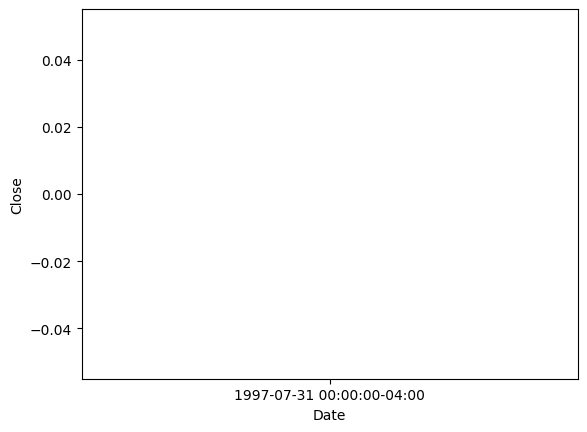

In [ ]:
# sns.lineplot(data = df, x = "Date", y = "Close")

<Axes: xlabel='Date', ylabel='LogReturn'>

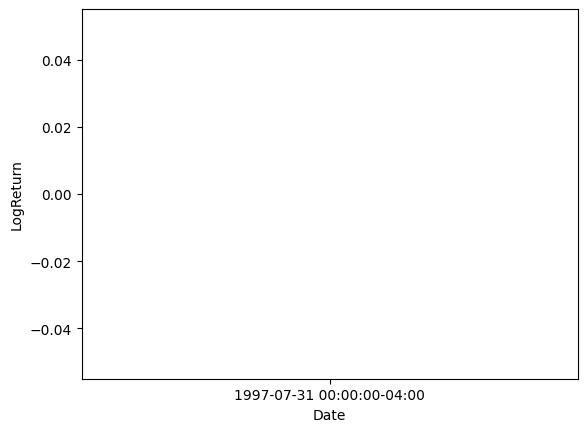

In [ ]:
# sns.lineplot(data = df, x = "Date", y = "LogReturn")

# ADF Test

In [210]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['LogReturn'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -19.40995809197387
p-value: 0.0
Used lags: 21
Number of observations: 6977
Critical Values:
   1%: -3.4312876103679093
   5%: -2.8619543482404506
   10%: -2.5669905536202626


In [211]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Close'] contains your time series
result = adfuller(df['Close'].dropna())

# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used lags:', result[2])
print('Number of observations:', result[3])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: 1.9738012517143586
p-value: 0.9986379261803221
Used lags: 27
Number of observations: 6972
Critical Values:
   1%: -3.431288283027058
   5%: -2.861954645454677
   10%: -2.5669907118326596


# ACF and PACF plots

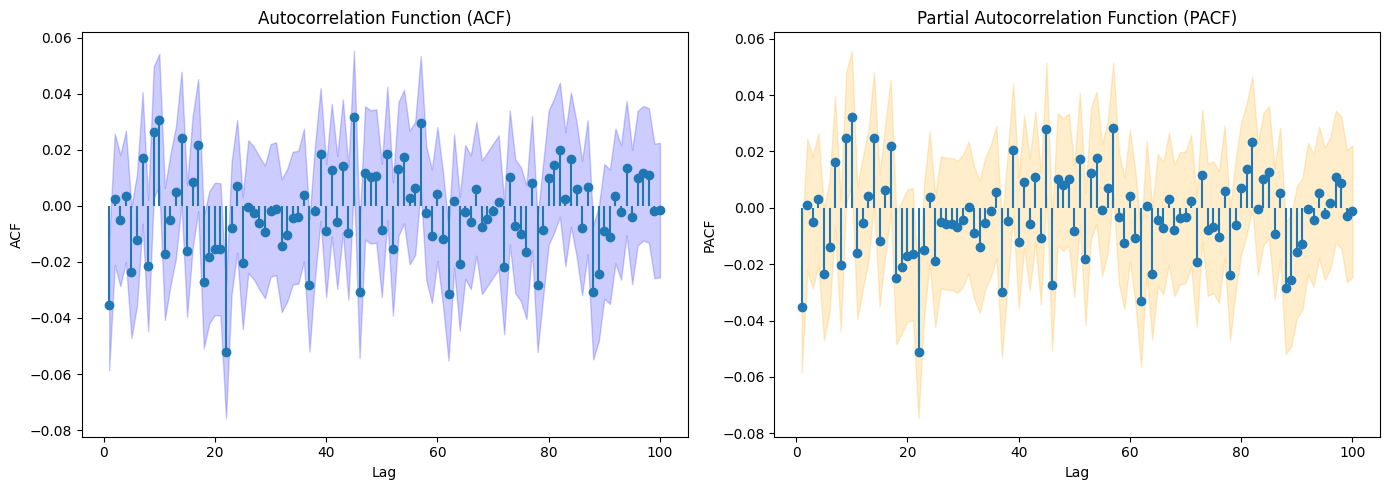

In [212]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Series without NaNs
series = df['LogReturn'].dropna()

# Compute ACF and PACF with confidence intervals
acf_vals, acf_confint = acf(series, nlags=100, alpha=0.05)  # 95% CI
pacf_vals, pacf_confint = pacf(series, nlags=100, method='ywm', alpha=0.05)

# Exclude lag 0
lags = np.arange(1, 101)
acf_vals = acf_vals[1:]
acf_confint = acf_confint[1:]
pacf_vals = pacf_vals[1:]
pacf_confint = pacf_confint[1:]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
axes[0].stem(lags, acf_vals, basefmt=" ")
axes[0].fill_between(lags, acf_confint[:, 0] - acf_vals + acf_vals, acf_confint[:, 1] - acf_vals + acf_vals, 
                     color='blue', alpha=0.2)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# PACF plot
axes[1].stem(lags, pacf_vals, basefmt=" ")
axes[1].fill_between(lags, pacf_confint[:, 0] - pacf_vals + pacf_vals, pacf_confint[:, 1] - pacf_vals + pacf_vals, 
                     color='orange', alpha=0.2)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

plt.tight_layout()
plt.show()


# Plots

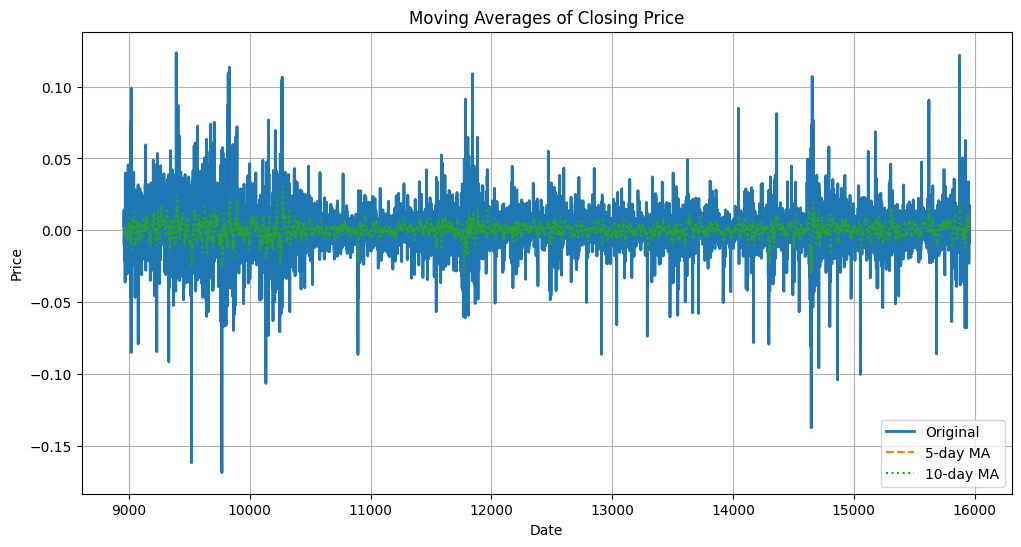

In [213]:
df['MA_5'] = df['LogReturn'].rolling(window=5).mean()
df['MA_10'] = df['LogReturn'].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['LogReturn'], label='Original', linewidth=2)
plt.plot(df['MA_5'], label='5-day MA', linestyle='--')
plt.plot(df['MA_10'], label='10-day MA', linestyle=':')
plt.title('Moving Averages of Closing Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

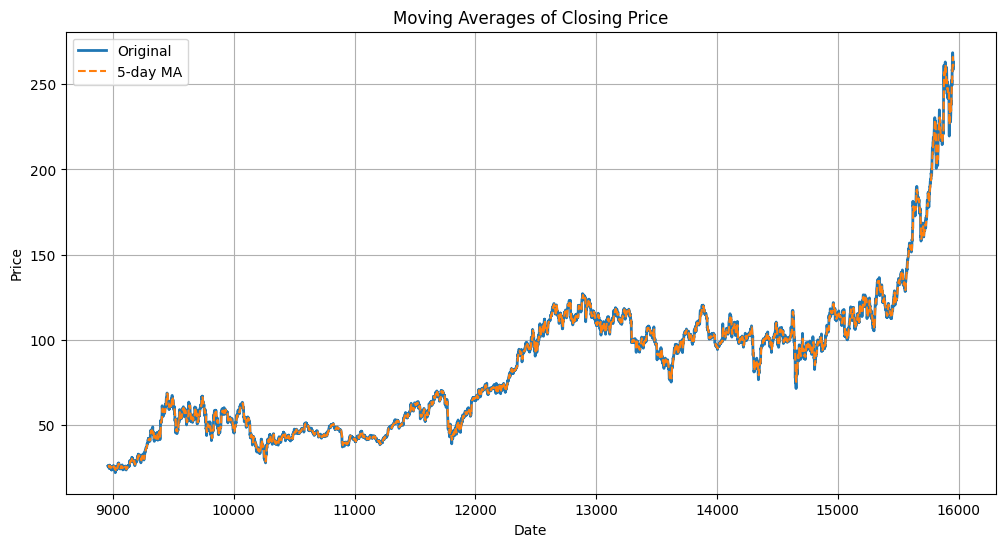

In [214]:
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original', linewidth=2)
plt.plot(df['MA_5'], label='5-day MA', linestyle='--')
# plt.plot(df['MA_10'], label='10-day MA', linewidth='')
plt.title('Moving Averages of Closing Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [215]:
series_close = df['Close']
series_close.index = pd.to_datetime(series_close.index)
split = int(len(series_close) * 0.8)
train_close, test_close = series_close[:split], series_close[split:]

# ARMA Model

In [216]:
series = df['LogReturn']
series.index = pd.to_datetime(series.index)
split = int(len(series) * 0.8)
train, test = series[:split], series[split:]

model = ARIMA(train, order=(10,0,10))  # Order can be tuned here
fitted_model = model.fit()
print(fitted_model.summary())

/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              LogReturn   No. Observations:                 5600
Model:               ARIMA(10, 0, 10)   Log Likelihood               14842.276
Date:                Thu, 10 Jul 2025   AIC                         -29640.552
Time:                        17:00:17   BIC                         -29494.681
Sample:                    01-01-1970   HQIC                        -29589.719
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.994      0.320      -0.000       0.001
ar.L1         -0.1335      0.696     -0.192      0.848      -1.498       1.232
ar.L2          0.2286      0.578      0.395      0.6

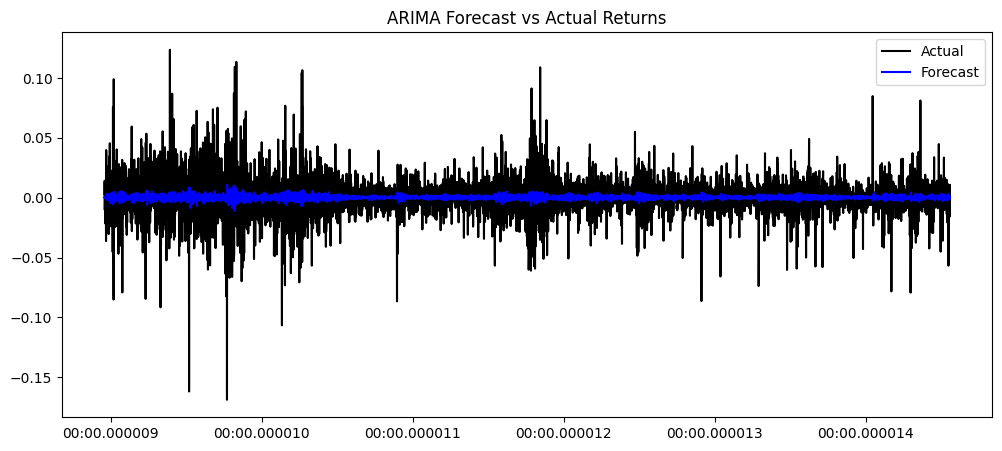

In [217]:
forecast = fitted_model.get_forecast(steps=len(train))
# mean_forecast = forecast.predicted_mean
predict = fitted_model.predict(start =train.index[0], end = train.index[-1])


plt.figure(figsize=(12,5))
plt.plot( train, label='Actual', color = 'black')
plt.plot( predict, label='Forecast', color = 'blue')
plt.legend()
plt.title('ARIMA Forecast vs Actual Returns')
plt.show()

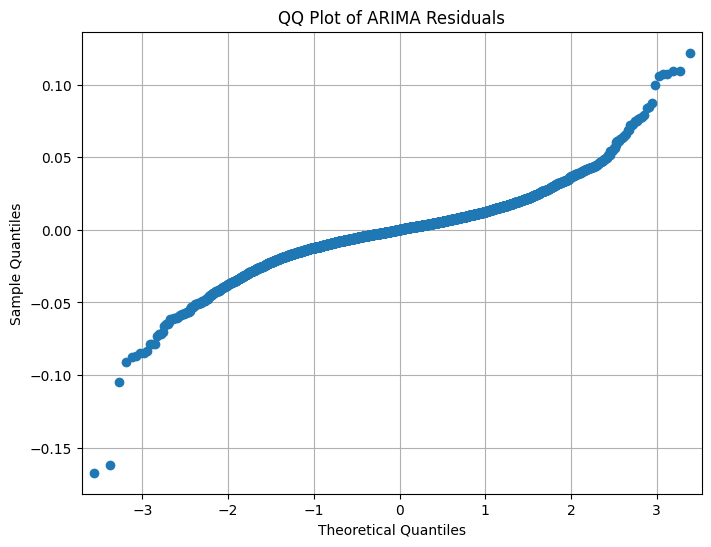

In [218]:
from statsmodels.graphics.gofplots import qqplot

residuals = fitted_model.resid

# QQ Plot
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of ARIMA Residuals')
plt.grid(True)
plt.show()

In [219]:
first_close = df['Close'].iloc[0]

# Reconstruct the Close prices
recClose = first_close * np.exp(predict.cumsum())


RMSE = 23.8186
MAE  = 18.3231
R²: 0.3145


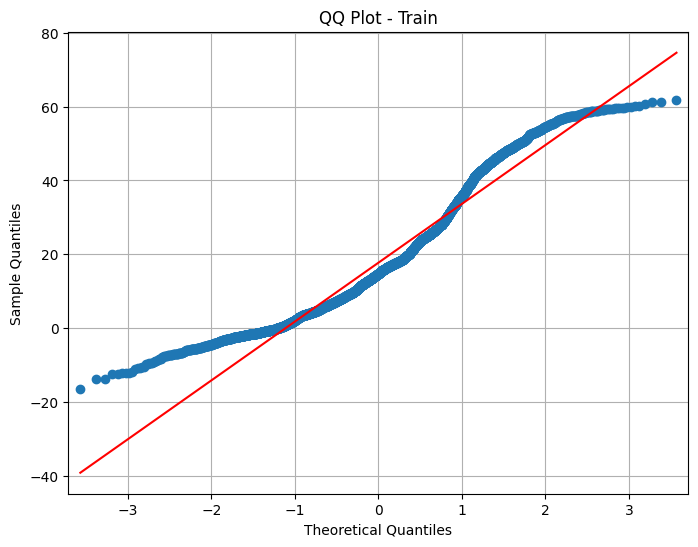

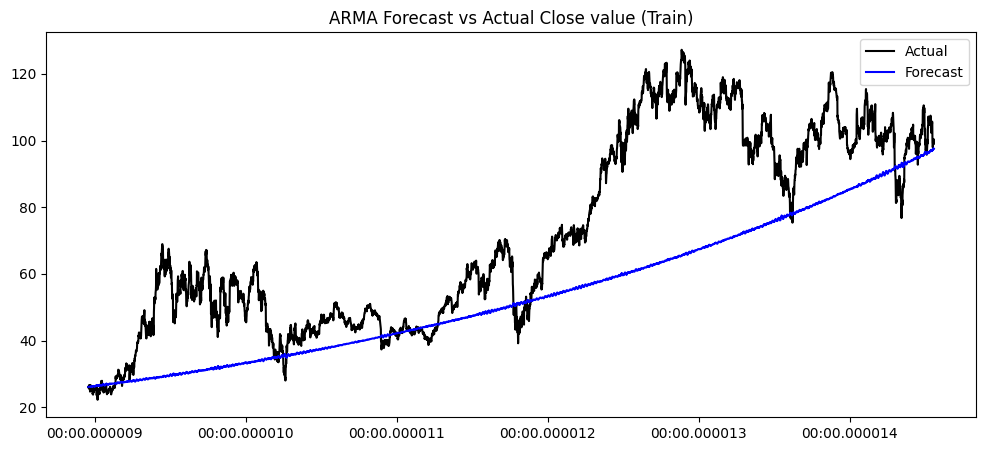

In [220]:
eval_df = pd.DataFrame({'actual': train_close.dropna(), 'predicted': recClose.dropna()}).dropna()

rmse = np.sqrt(mean_squared_error(eval_df['actual'], eval_df['predicted']))
mae = mean_absolute_error(eval_df['actual'], eval_df['predicted'])
directional_accuracy = (np.sign(eval_df['actual']) == np.sign(eval_df['predicted'])).mean()
r2_forecast = r2_score(eval_df['actual'], eval_df['predicted'])


print(f"RMSE = {rmse:.4f}")
print(f"MAE  = {mae:.4f}")
# print(f"Directional Accuracy = {directional_accuracy:.2%}")
print(f'R²: {r2_forecast:.4f}')

residuals = eval_df['actual'] - eval_df['predicted']
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot - Train')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot( eval_df['actual'], label='Actual', color = 'black')
plt.plot( eval_df['predicted'], label='Forecast', color = 'blue')
plt.legend()
plt.title('ARMA Forecast vs Actual Close value (Train)')
plt.show()